# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Read the dataset

In [2]:
dataset_path = 'data/creditcard.csv'
df = pd.read_csv(dataset_path)

### Split X, y

In [3]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

### Add bias to X

In [4]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

### One-hot encoding label

In [5]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

### Split train, val, test

In [6]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

### Standalize data

In [7]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [8]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

def compute_loss(y_hat, y):
    n = y.size

    return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

    return acc

In [9]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

### Train model

In [10]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        graident = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, graident, lr)


        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.300	Validation loss: 0.297

EPOCH 2:	Training loss: 0.176	Validation loss: 0.174

EPOCH 3:	Training loss: 0.115	Validation loss: 0.113

EPOCH 4:	Training loss: 0.081	Validation loss: 0.080

EPOCH 5:	Training loss: 0.062	Validation loss: 0.061

EPOCH 6:	Training loss: 0.049	Validation loss: 0.049

EPOCH 7:	Training loss: 0.041	Validation loss: 0.041

EPOCH 8:	Training loss: 0.035	Validation loss: 0.035

EPOCH 9:	Training loss: 0.031	Validation loss: 0.031

EPOCH 10:	Training loss: 0.028	Validation loss: 0.027

EPOCH 11:	Training loss: 0.025	Validation loss: 0.025

EPOCH 12:	Training loss: 0.023	Validation loss: 0.023

EPOCH 13:	Training loss: 0.021	Validation loss: 0.021

EPOCH 14:	Training loss: 0.020	Validation loss: 0.020

EPOCH 15:	Training loss: 0.019	Validation loss: 0.018

EPOCH 16:	Training loss: 0.017	Validation loss: 0.017

EPOCH 17:	Training loss: 0.017	Validation loss: 0.016

EPOCH 18:	Training loss: 0.016	Validation loss: 0.015

EPOCH 19:	Training

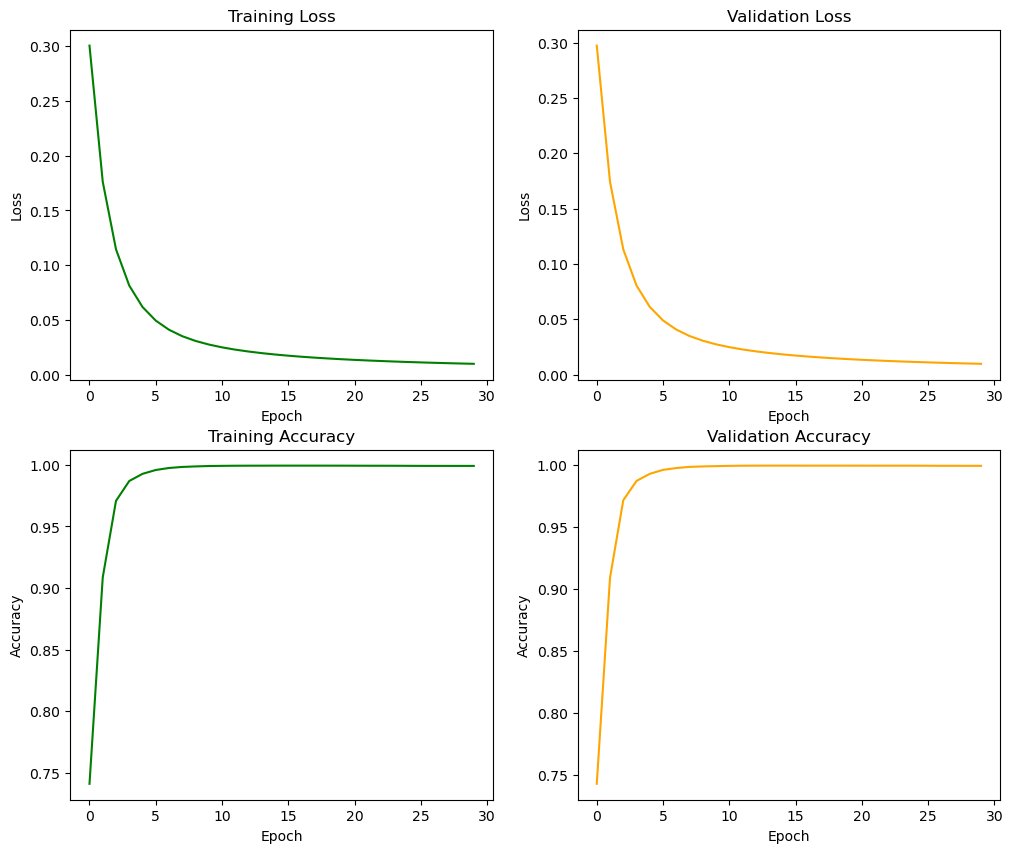

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, 'green')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, 'green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [12]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy on validation set: {val_set_acc}')
print(f'Accuracy on test set: {test_set_acc}')

Evaluation on validation and test set:
Accuracy on validation set: 0.9993153330290369
Accuracy on test set: 0.9992275552122467


# Twitter Sentiment Analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read dataset

In [14]:
dataset_path = 'data/Twitter_Data.csv'
df = pd.read_csv(dataset_path)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


### Clean the dataset

In [15]:
df = df.dropna()

In [16]:
def text_normalize(text):
    #Lowercasing
    text = text.lower()

    # Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlink removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [17]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [18]:
intercept = np.ones((
    X.shape[0], 1)
)
X_b = np.concatenate(
    (intercept, X),
    axis=1
)

In [19]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

### Split train, val, test

In [20]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [28]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[:, None]

def compute_loss(y_hat, y):
    n = y.size

    return (-1 / n) * np.sum(y * np.log(y_hat))

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    
    return acc

In [29]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta =  np.random.uniform(
    size=(n_features, n_classes)
)

In [30]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        graident = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, graident, lr)


        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.377	Validation loss: 0.376

EPOCH 2:	Training loss: 0.377	Validation loss: 0.376

EPOCH 3:	Training loss: 0.377	Validation loss: 0.376

EPOCH 4:	Training loss: 0.376	Validation loss: 0.375

EPOCH 5:	Training loss: 0.376	Validation loss: 0.375

EPOCH 6:	Training loss: 0.376	Validation loss: 0.375

EPOCH 7:	Training loss: 0.375	Validation loss: 0.374

EPOCH 8:	Training loss: 0.375	Validation loss: 0.374

EPOCH 9:	Training loss: 0.375	Validation loss: 0.374

EPOCH 10:	Training loss: 0.374	Validation loss: 0.373

EPOCH 11:	Training loss: 0.374	Validation loss: 0.373

EPOCH 12:	Training loss: 0.374	Validation loss: 0.373

EPOCH 13:	Training loss: 0.374	Validation loss: 0.373

EPOCH 14:	Training loss: 0.373	Validation loss: 0.372

EPOCH 15:	Training loss: 0.373	Validation loss: 0.372

EPOCH 16:	Training loss: 0.373	Validation loss: 0.372

EPOCH 17:	Training loss: 0.372	Validation loss: 0.372

EPOCH 18:	Training loss: 0.372	Validation loss: 0.371

EPOCH 19:	Training

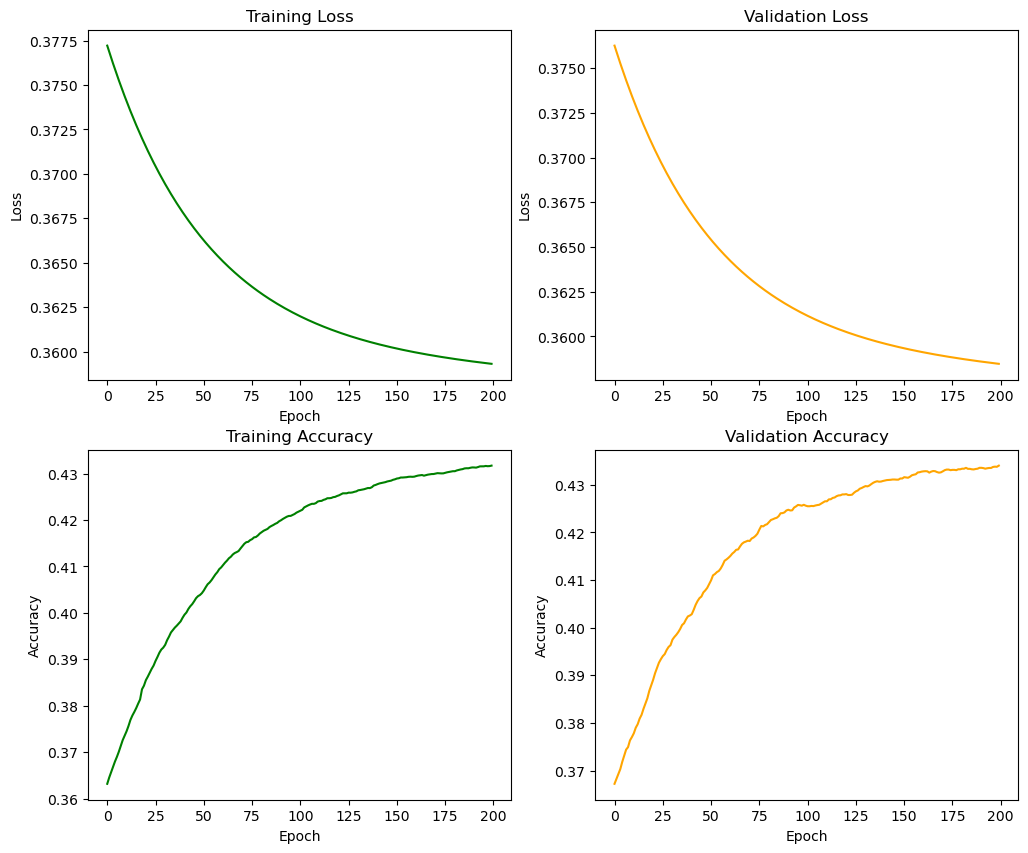

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, 'green')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, 'green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [32]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.4340369393139842
Accuracy: 0.4322881511934712
